## Nama : Sharfinna Zaldy 
## NIM  : 11190940000011
## Trending Topic "Selamat Ulang Tahun"

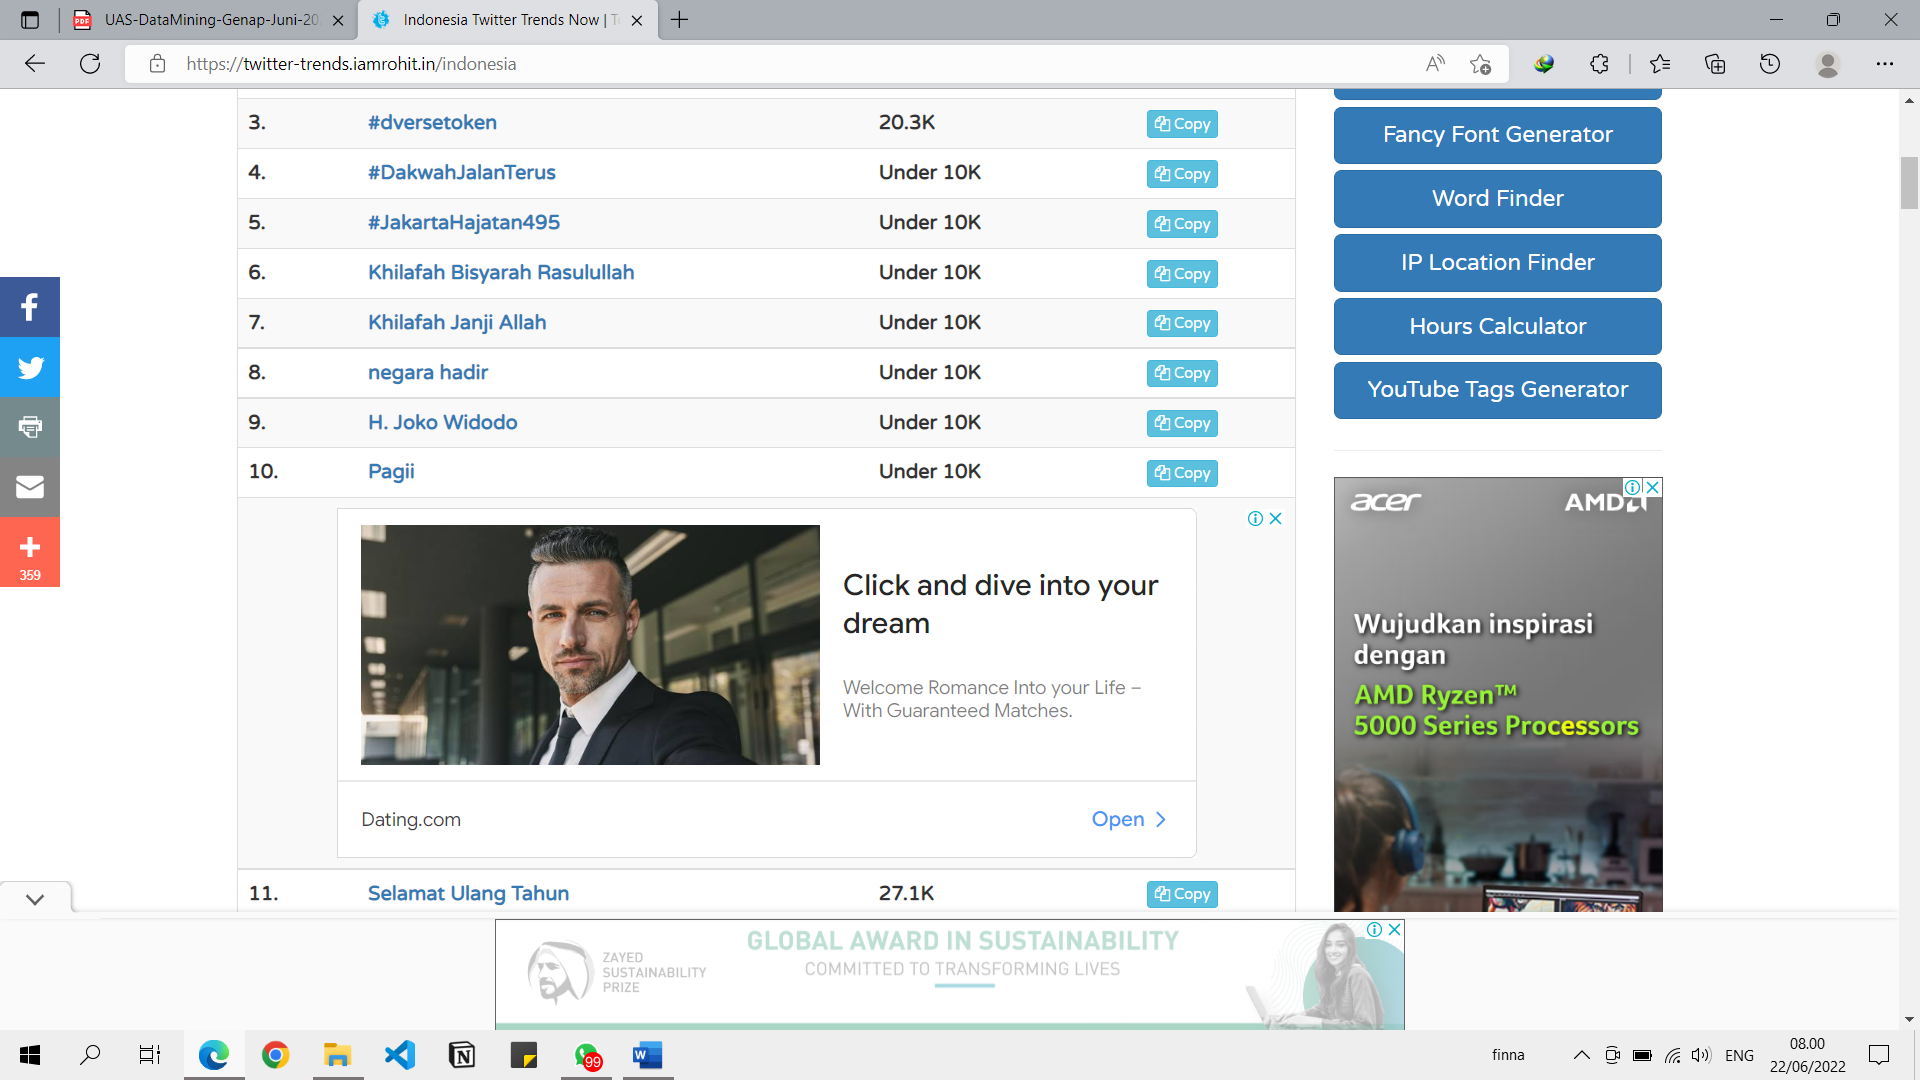

# Import Modul

In [1]:
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab
    IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataNlpTm.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger
    
    !pip install spacy unidecode textblob sastrawi pyLDAvis
    !pip install --upgrade python-crfsuite gensim
    !pip install sklearn-pycrfsuite

    !pip install --upgrade spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !pip install --upgrade unidecode twython tweepy beautifulsoup4 tika
    !python -m spacy download en
    !python -m spacy download xx
    !python -m spacy download en_core_web_sm
    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2022-06-24 11:25:50--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataDDGsna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8030 (7.8K) [text/plain]
Saving to: ‘taudataDDGsna.py’

taudataDDGsna.py    100%[===================>]   7.84K  --.-KB/s    in 0s      

2022-06-24 11:25:50 (49.5 MB/s) - ‘taudataDDGsna.py’ saved [8030/8030]

--2022-06-24 11:25:50--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataNlpTm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14001 (14K

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [2]:
import taudataDDGsna as tau
import tweepy, json, urllib.request, requests
import pandas as pd 
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs
from tqdm import tqdm
"done"

'done'

# Proses Crawling Data Trending Topic

In [ ]:
# # API Keys 
# Ck = 's9MK3ip8k5z151wtUF4pBmB6k' # consumer_key
# Cs = 'LJMJVkTiglzdfAafb94d9VAbg4eEpvVU6o1tK9xjc7oUjQM0lg' # consumer_secret
# At = '1536962285570510849-O24zoUWh0586MgfH5t9Gqez98qQLrp' # access_token
# As = '7WZyLJErW9Bob1rq9O4Uw6XWwkT6GMhBKU9rP6NWfVQvJ' # access_secret

In [ ]:
# import tweepy

# auth = tweepy.auth.OAuthHandler(Ck, Cs)
# auth.set_access_token(At, As)
# api = tweepy.API(auth, wait_on_rate_limit=True, timeout=180, retry_count=5, retry_delay=3)
# usr_ = api.verify_credentials()
# print('Welcome "{}" you are now connected to twitter server'.format(usr_.name))

In [ ]:
# # topic dari link https://twitter-trends.iamrohit.in/indonesia "Selamat Ulang Tahun"
# query = 'Selamat Ulang Tahun'
# N = 5000 
# T = []
# for post in tqdm(tweepy.Cursor(api.search_tweets, q=query, lang='id', tweet_mode='extended').items(N)):
#     T.append(post)

In [ ]:
# # T bukan sekedar list of tweets 
# tweets = [t._json for t in T]
# print('Berhasil mendapatkan {} tweets'.format(len(tweets)))

# Save Data Hasil Crawling (format json)

In [ ]:
# import json 
# def saveTweets(tweets, file='Tweets.json'): #in Json Format
#     with open(file, 'w') as f:
#         for t in tweets:
#             try:
#                 f.write(json.dumps(t)+'\n')
#             except:
#                 pass

In [ ]:
# # Menyimpan hasil crawling twitter
# fileName = 'data/Sharfinna-11190940000011-UAS-DataMining-2022.json'
# saveTweets(tweets, file=fileName)
# print('Saved to '+fileName)

# Load Data Crawling Kembali

In [ ]:
# ! gdown --id 1NqBM3izxkr-cV6uDJbUg71vw1VFsmYIK/view?usp=sharing

In [3]:
from google.colab import drive
drive.mount('/content/drives')

Mounted at /content/drives


In [4]:
%cd content

[Errno 2] No such file or directory: 'content'
/content


In [5]:
fileName='/content/drives/MyDrive/Data Mining/Sharfinna-11190940000011-UAS-DataMining-2022.json'

In [ ]:
# fileName='/content/drive/MyDrive/ Data Mining/Sharfinna-11190940000011-UAS-DataMining-2022.json'

In [6]:
# Me-load kembali 
def loadTweets(file='Sharfinna-11190940000011-UAS-DataMining-2022.json'):
    f=open(file,encoding='utf-8', errors ='ignore', mode='r')
    T=f.readlines();f.close()
    for i,t in enumerate(T):
        T[i] = json.loads(t.strip())
    return T

In [7]:
T2 = loadTweets(file=fileName)
print('tweet pertama oleh "{}" : "{}"'.format(T2[0]['user']['screen_name'],T2[0]['full_text']))

tweet pertama oleh "BENDADIWONG3" : "RT @mikuroQ: Meski byk yg bilang klau ibu kota Jkt cukup kejam, bagiku Jkt adlh kota tempat aku tinggal bersama keluarga
Wlau tiap hari dil…"


In [9]:
df = pd.DataFrame((T2))
df[['created_at', 'full_text', 'favorite_count', 'retweet_count']]

,created_at,full_text,favorite_count,retweet_count
0,Fri Jun 24 10:19:58 +0000 2022,RT @mikuroQ: Meski byk yg bilang klau ibu kota...,0,17
1,Fri Jun 24 10:19:49 +0000 2022,selamat ulang tahun cowok choco mint ku 😍😍😍😍 h...,0,0
2,Fri Jun 24 10:19:37 +0000 2022,RT @sakhansaaa: Dari dulu setiap ulang tahun s...,0,1019
3,Fri Jun 24 10:19:26 +0000 2022,RT @puty: Kemarin dibolehin ngintip Perpustaka...,0,1410
4,Fri Jun 24 10:19:24 +0000 2022,"RT @al_lasan: Selamat Ulang Tahun Pak Jokowi, ...",0,14
...,...,...,...,...
4995,Thu Jun 23 05:31:44 +0000 2022,"RT @An_Kiim: “Tiup Lilin Buat Jokowi, BEM UI： ...",0,907
4996,Thu Jun 23 05:31:40 +0000 2022,AYU TING TING POSTING FOTO JORDI ONSU DI MOMEN...,0,0
4997,Thu Jun 23 05:31:34 +0000 2022,"RT @geloraco: Tiup Lilin Buat Jokowi, Mahasisw...",0,1196
4998,Thu Jun 23 05:31:21 +0000 2022,RT @puty: Kemarin dibolehin ngintip Perpustaka...,0,1411


# Preprocessing Data

In [11]:
from tqdm import tqdm 

stopId, lemmaId = tau.LoadStopWords(lang='id')
data = [t['full_text'] for t in T2]
cleaned_data = []
for t in tqdm(data):
    doc = tau.cleanText(t, stops = None, symbols_remove = True, min_charLen = 3, fixTag= True)
    cleaned_data.append(doc)    
"done"

100%|██████████| 5000/5000 [00:03<00:00, 1413.90it/s]


'done'

In [12]:
print(T2[0], end='\n\n') # sebelum clean
print(cleaned_data[0], end='\n\n') # setelah clean

{'created_at': 'Fri Jun 24 10:19:58 +0000 2022', 'id': 1540278553878491137, 'id_str': '1540278553878491137', 'full_text': 'RT @mikuroQ: Meski byk yg bilang klau ibu kota Jkt cukup kejam, bagiku Jkt adlh kota tempat aku tinggal bersama keluarga\nWlau tiap hari dil…', 'truncated': False, 'display_text_range': [0, 140], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'mikuroQ', 'name': 'Panda Mikucan', 'id': 1053271569877749760, 'id_str': '1053271569877749760', 'indices': [3, 11]}], 'urls': []}, 'metadata': {'iso_language_code': 'in', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1131231269600186368, 'id_str': '1131231269600186368', 'name': 'BEN DADI WONG ꦨꦼꦟ꧀ꦢꦢꦶꦮꦺꦴꦁ', 'screen_name': 'BENDADIWONG3', 'location'

In [58]:
df1 = pd.DataFrame((cleaned_data))
df1.columns=['full_text']
df1

,full_text
0,mikuroq meski byk bilang klau ibu kota jkt cuk...
1,selamat ulang tahun cowok choco mint
2,sakhansaa dari dulu setiap ulang tahun selalu ...
3,puty kemarin dibolehin ngintip perpustakaan ja...
4,al_lasan selamat ulang tahun pak jokowi presid...
...,...
4995,an_kiim tiup lilin buat jokowi bem selamat ula...
4996,ayu ting ting posting foto jordi onsu momen ul...
4997,geloraco tiup lilin buat jokowi mahasiswa sela...
4998,puty kemarin dibolehin ngintip perpustakaan ja...


In [14]:
df1.duplicated().sum()

2794

In [15]:
df1.drop_duplicates(inplace = True)
df1

,full_text
0,mikuroq meski byk bilang klau ibu kota jkt cuk...
1,selamat ulang tahun cowok choco mint
2,sakhansaa dari dulu setiap ulang tahun selalu ...
3,puty kemarin dibolehin ngintip perpustakaan ja...
4,al_lasan selamat ulang tahun pak jokowi presid...
...,...
4989,selamat ulang tahun bapak sekretaris jenderal ...
4990,senandung_g selamat ulang tahun kepada bapak k...
4992,selamat ulang tahun lagi moga selalu sehat dan...
4994,dombreadnsa ciee ultah selamat ulang tahun the...


In [16]:
df1.duplicated().sum()

0

In [17]:
df1.to_csv('data/Sharfinna-11190940000011-UAS-DataMining-2022.csv',index=False)

In [18]:
# Save ke txt ... lalu nanti akan di upload ke Voyant Tools
filename = 'data/Sharfinna-11190940000011-UAS-DataMining-2022.txt'
with open(filename, 'w') as f:
    for T in cleaned_data:
        f.write(T+'\n')
 
"Saved to data/Sharfinna-11190940000011-UAS-DataMining-2022.txt"

'Saved to data/Sharfinna-11190940000011-UAS-DataMining-2022.txt'

# Voyant Tools


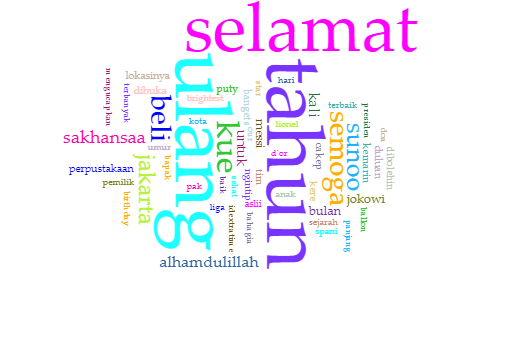

Berdasrkan voyant dari word could ini menunjukan adanya frekuensi kata yang paling banyak muncul atau paling banyak disebut yaitu **selamat, tahun, ulang, Jakarta, dan semoga** dari total seluruh kata sebanyak 85,531 . Jika di tinjau menggunakan voyant ini terdapat adanya sebuah kepadatan kata-kata sebesar 0.114 yang didapat dari unik word dan total word.  

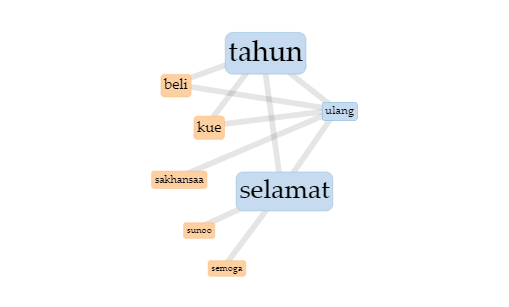

Jika dilihat dari word could, kata-kata yang paling banyak yaitu tahun, selamat, ulang, jakarta dan semoga. Dalam link word ini terdapat 3 kata yang paling berhubungan dengan kata-kata lainnya yang terdapat dalam data tweet. Kata **selamat** berhubungan dengan suno, semoga, dan tahun dimana dalam salah satu tweet menunjukan ucapan selamat ualng tahun kepada suno dengan memberikan harapan-harapan. Kata **ulang** berhubungan banyak dengan kata-kata lainnya yaitu selamat, skhansaa, kue, beli dan tahun. Jika dilihat dari data-data tweet terdapat banyak kalimat retweet mengenai kata-kata tersebut sehingga muncul dan berkaitan dengan  kata **ulang**. Begitupula dengan kata **tahun** yang sangat erat juga keterkaitannya dengan satu kata dengan yang lainnya.  

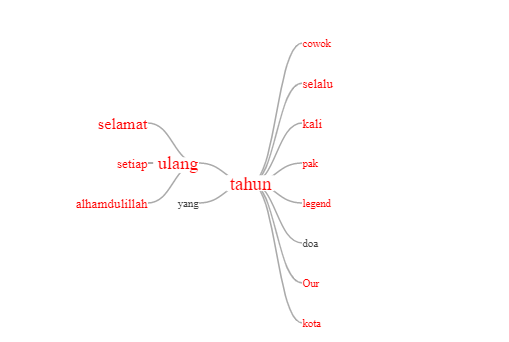

Jika dilihat dalam word tree kata yang paling menonjol yaitu tahun dan ulang. Kata **tahun** pun juga memiliki keterikatan dengan kata lain yang lebih secara detail dibandingkan link word. Sedangkan kata **ulang** ada berikatan juga dengan kata **selamat** yang sebelumnya menjadi kata yang paling utama. 

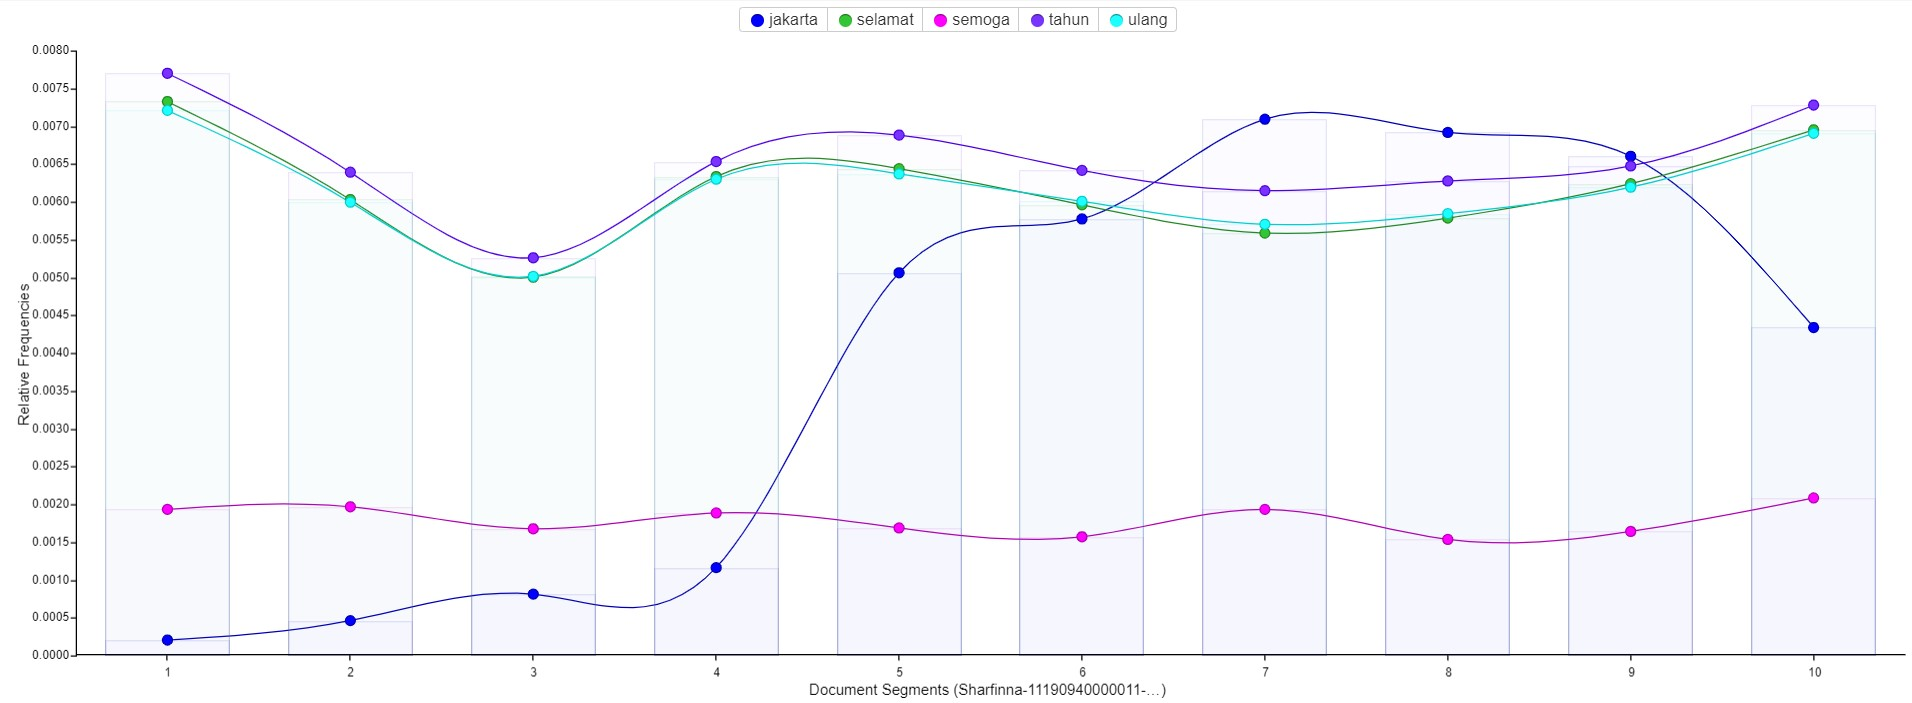

Terdapat grafik frekuensi kata yang dibagi menjadi 5 bagian kata yang paling sering muncul yaitu tahun, selamat, ulang, jakarta dan semoga. Dalam grafik tersebut memiliki 10 bagian sigmen yang dimana kata yang paling tinggi terdapat dalam kata ulang, tahun dan selamat. Sedangkan kata **jakarta** mempunyai frekuensi sigmen tertinggi pada sigmen nomer 7. 

# Topic Modeling

In [25]:
# Import Modul yang akan digunakan

import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab; IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataNlpTm.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/dataset_tweet_sentiment_opini_film.csv
    !pip install spacy unidecode textblob sastrawi pyLDAvis
    !pip install --upgrade python-crfsuite gensim
    !pip install sklearn-pycrfsuite
    !python -m spacy download xx_ent_wiki_sm
    !python -m spacy download xx_sent_ud_sm
    !python -m spacy download en_core_web_sm

    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2022-06-24 12:24:21--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataNlpTm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14001 (14K) [text/plain]
Saving to: ‘taudataNlpTm.py.1’

taudataNlpTm.py.1   100%[===================>]  13.67K  --.-KB/s    in 0s      

2022-06-24 12:24:21 (35.9 MB/s) - ‘taudataNlpTm.py.1’ saved [14001/14001]

mkdir: cannot create directory ‘data’: File exists
--2022-06-24 12:24:22--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [26]:
import taudataNlpTm as tau, itertools, re, pickle, pyLDAvis, pyLDAvis.sklearn, spacy, urllib.request
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns 
from tqdm import tqdm
from nltk.tag import CRFTagger
from gensim.models import Phrases
from gensim.corpora.dictionary import Dictionary
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups

pyLDAvis.enable_notebook()
sns.set(style="ticks", color_codes=True)
random_state = 99
"done"

'done'

In [27]:
# membuat VSM
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer()

data = cleaned_data.copy()
tf = tf_vectorizer.fit_transform(data)
tf_terms = tf_vectorizer.get_feature_names()

tf.shape

(5000, 5836)

In [31]:
# membentuk model LDA-nya
from sklearn.decomposition import LatentDirichletAllocation as LDA

n_topics = 5 
lda = LDA(n_components=n_topics, learning_method='batch', random_state=0).fit(tf)   
lda

LatentDirichletAllocation(n_components=5, random_state=0)

In [32]:
# melihat Topik-topiknya
vsm_topics = lda.transform(tf)
print(vsm_topics.shape)
vsm_topics

(5000, 5)


array([[0.37684942, 0.00834964, 0.54338121, 0.00849285, 0.06292688],
       [0.02877905, 0.02887508, 0.0286859 , 0.88480809, 0.02885188],
       [0.00956479, 0.96174629, 0.00953918, 0.00958875, 0.009561  ],
       ...,
       [0.01678752, 0.9327532 , 0.01672713, 0.01691542, 0.01681673],
       [0.01111338, 0.0111122 , 0.95554822, 0.01111112, 0.01111509],
       [0.00720172, 0.00716813, 0.00715249, 0.00728659, 0.97119108]])

In [33]:
doc_topic =  [a.argmax()+1 for a in tqdm(vsm_topics)] # topic of docs
doc_topic[:10]

100%|██████████| 5000/5000 [00:00<00:00, 311969.42it/s]


[3, 4, 2, 3, 1, 2, 3, 1, 3, 2]

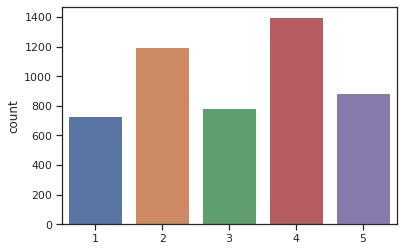

In [34]:
# plot
plot = sns.countplot(doc_topic)

In [35]:
Top_Words = 20
print('Printing top {0} Topics, with top {1} Words:'.format(n_topics, Top_Words))
tau.print_Topics(lda, tf_terms, n_topics, Top_Words)

Printing top 5 Topics, with top 20 Words:
Topic #1:
sunoo tahun ulang selamat yang aku kamu dan ini our brightest star hari semoga untuk selalu shine born anak mau
Topic #2:
tahun ulang beli kue buat dari selalu sakhansaa ini sendiri setiap dulu alhamdulillah kali diri selain selamat jokowi dengan dalam
Topic #3:
jakarta akan tahun depan cakep kemarin tim duluan bulan ngintip lokasinya perpustakaan bangets aslii dibolehin dibuka puty kere selamat ulang
Topic #4:
tahun selamat ulang semoga selalu dan sehat yang umur panjang bahagia kak happy yaa baik untuk ini juga sukses messi
Topic #5:
tahun selamat ulang bapak semoga dan mengucapkan yang jakarta keluarga besar kesehatan kelas andap budhi pol selalu indonesia presiden komjen


In [36]:
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)  

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.127674 -0.279777       1        1  26.832182
3      0.085394  0.082757       2        1  20.188473
4      0.054734  0.107153       3        1  18.039650
0      0.077194  0.127411       4        1  17.880366
2     -0.344997 -0.037545       5        1  17.059329, topic_info=           Term         Freq        Total Category  logprob  loglift
530        beli  1160.000000  1160.000000  Default  30.0000  30.0000
2799        kue  1145.000000  1145.000000  Default  29.0000  29.0000
5039      sunoo   881.000000   881.000000  Default  28.0000  28.0000
2188    jakarta   877.000000   877.000000  Default  27.0000  27.0000
4489  sakhansaa   616.000000   616.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
3407      messi   166.046469   432.764839   Topic5  -4.4453   0.8105
5112      tahun   436.862111  5239.462597   Topic5  -3.4779  -0.7159
4687    selamat   320.142538  3731.674529   Topic5  -3.7888  -0.6874
5500      ulang   292.328106  4853.853660   Topic5  -3.8797  -1.0412
5744       yang   142.677593  1191.561458   Topic5  -4.5970  -0.3540

[291 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
4         2  0.982169           aamiin
58        1  0.981501  adriansyahyasin
83        5  0.961618    agusyudhoyono
111       1  0.092767             akan
111       5  0.905957             akan
...     ...       ...              ...
5744      4  0.304642             yang
5744      5  0.120011             yang
5779      3  0.994127             your
5822      3  0.981417           zidane
5826      3  0.993110         zinedine

[368 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 5, 1, 3])

Dari model yang didapatkan secara umum data yang di ambil terbentuk dari 5 buah topik yaitu topik terkait pembahasan suno ulang tahun yang menjadi our brightest star bagi penggemarnya, ucapan ulang tahun Presiden Jokowi, perayaan ulang tahun Ibu kota DKI Jakarta, ucapan selamat ulang tahun kepada salah satu pengguna twitter, dan ucapan ulang tahun kepada segenap orang yang sedang berulang tahun di 3 hari lalu. Secara statistik isu topik 2, 3, dan 4 sangat berhubungan kata-katanya, sedangkan berbeda jauh dengn kata-kata yang berada di topik 1 dan 5 walaupun masih dalam lingkum ulang tahun. 

In [52]:
file_ = 'data/Sharfinna-11190940000011-UAS-DataMining-2022.csv'

data = pd.read_csv(file_)

col = data.columns
print("Kolom di data: ", col)
data = data[col[-1]].values
data[0]

Kolom di data:  Index(['full_text'], dtype='object')


'mikuroq meski byk bilang klau ibu kota jkt cukup kejam bagiku jkt adlh kota tempat aku tinggal bersama keluarga wlau tiap hari dil'

In [53]:
from spacy.lang.id import Indonesian
from nltk.tag import CRFTagger
nlp_id = Indonesian()  # Language Model

def NLPfilter(t, filters):
    tokens = nlp_id(t)
    tokens = [str(k) for k in tokens if len(k)>2]
    hasil = ct.tag_sents([tokens])
    return [k[0] for k in hasil[0] if k[1] in filters]

filters = set(['NN', 'NNP', 'NNS', 'NNPS', 'JJ'])
data_postTag = []
try:
    nlp_id = Indonesian()  # Language Model
    ct = CRFTagger()
    ct.set_model_file('data/all_indo_man_tag_corpus_model.crf.tagger')
    for i, d in tqdm(enumerate(data)):
        data_postTag.append(NLPfilter(d,filters))
    print(' '.join(data_postTag[0]))
    data = [d for d in data_postTag if d]
except:
    data_postTag = data
    data = [d.split() for d in data_postTag if d]
    print("CRFtagger Failed, try to run it locally (not using Google Colab).")

CRFtagger Failed, try to run it locally (not using Google Colab).


In [54]:
bigram_t = Phrases(data, min_count=5)
trigram_t = Phrases(bigram_t[data], min_count=5)
for idx, d in enumerate(data):
    for token in bigram_t[d]:
        if '_' in token:# Token is a bigram, add to document.
            data[idx].append(token)
    for token in trigram_t[d]:
        if '_' in token:# Token is a bigram, add to document.
            data[idx].append(token)

# Create a dictionary representation of the documents.
# Remove rare & common tokens
dictionary_t = Dictionary(data)
dictionary_t.filter_extremes(no_below=2, no_above=0.90)
#Create dictionary and corpus required for Topic Modeling
corpus_t = [dictionary_t.doc2bow(doc) for doc in data]
corpus_t = [t for t in corpus_t if t] # remove empty corpus
print('Number of unique tokens: %d' % len(dictionary_t))
print('Number of documents: %d' % len(corpus_t))
print(corpus_t[:1])

Number of unique tokens: 2529
Number of documents: 2133
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]]


In [55]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data)
id2word

In [56]:
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(id2word, corpus, texts, limit=1, start=2, step=1):
    coherence_values = []
    for num_topics in range(start, limit, step):
        LDAmodel_ = LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)
        cm = CoherenceModel(model=LDAmodel_, texts=texts, corpus=corpus, coherence='c_v')
        with np.errstate(invalid='ignore'):
            coherence_values.append(cm.get_coherence())
    return coherence_values

In [57]:
start, step, limit = 2, 1, 10 # Ganti dengan berapa banyak Topic yang ingin di hitung/explore
coh_t, kCV = [], 5 # hati-hati sangat LAMBAT karena cross validasi pada metode yang memang tidak efisien (LDA)

print('iterasi ke: ', end = ' ')
for i in range(kCV):
    print(i+1, end = ', ', flush=True)
    c = compute_coherence_values(id2word, corpus_t, data, limit=limit, start=start, step=step)
    coh_t.append(c)
    
coherence_t = np.mean(np.array(coh_t), axis=0)
"done"

iterasi ke:  1, 2, 3, 4, 5, 

'done'

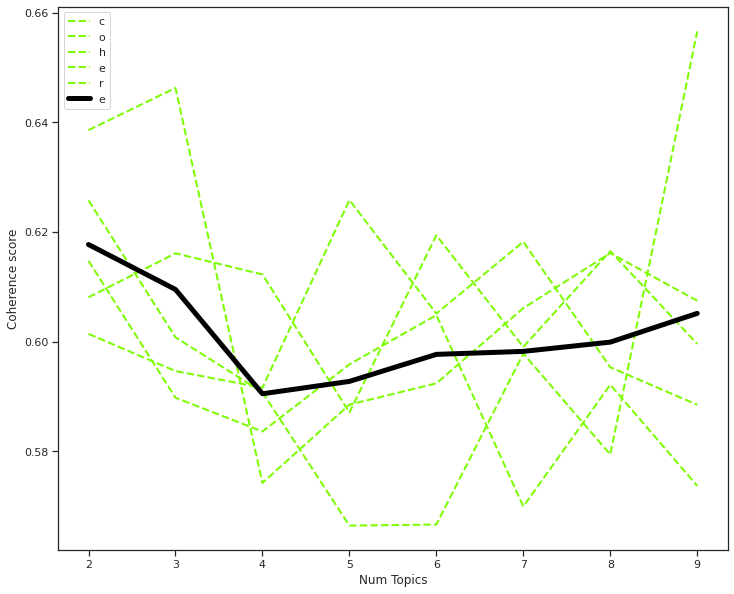

In [49]:
# Show graph
x = range(start, limit, step)
plt.figure(figsize=(12,10))
for c in coh_t:
    plt.plot(x, c, '--', color = 'lawngreen', linewidth = 2)
plt.plot(x, coherence_t, '-', color = 'black', linewidth = 5)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Analisis Sentimen

In [48]:
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab; IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataNlpTm.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger

    !pip install spacy python-crfsuite unidecode textblob sastrawi
    !python -m spacy download xx
    !python -m spacy download en_core_web_sm

    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2022-06-24 13:07:18--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataNlpTm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14001 (14K) [text/plain]
Saving to: ‘taudataNlpTm.py.2’

taudataNlpTm.py.2   100%[===================>]  13.67K  --.-KB/s    in 0s      

2022-06-24 13:07:19 (44.2 MB/s) - ‘taudataNlpTm.py.2’ saved [14001/14001]

mkdir: cannot create directory ‘data’: File exists
--2022-06-24 13:07:19--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [45]:
!wget -P data/ https://github.com/shrfinna/DM_CrawlingTwitter/blob/main/Sharfinna-11190940000011-UAS-DataMining-2022%20-%20Label.csv

--2022-06-24 13:01:56--  https://github.com/shrfinna/DM_CrawlingTwitter/blob/main/Sharfinna-11190940000011-UAS-DataMining-2022%20-%20Label.csv
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data/Sharfinna-11190940000011-UAS-DataMining-2022 - Label.csv’

Sharfinna-111909400     [  <=>               ] 803.47K  3.19MB/s    in 0.2s    

2022-06-24 13:01:57 (3.19 MB/s) - ‘data/Sharfinna-11190940000011-UAS-DataMining-2022 - Label.csv’ saved [822756]



In [47]:
label_sentimen = pd.read_csv('data/Sharfinna-11190940000011-UAS-DataMining-2022 - Label.csv') # run locally
label_sentimen.head(), label_sentimen.shape

ParserError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

seed = 99 # Biasakan menggunakan ini
testSize = 0.2

x_train, x_test, y_train, y_test = train_test_split(label_sentimen["tweet"], label_sentimen["label"], 
                                                    test_size=testSize, random_state = seed)
print(x_train.shape, x_test.shape)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vsm = TfidfVectorizer(lowercase=True, smooth_idf= True, sublinear_tf=True, 
                                   ngram_range=(1, 2), max_df=0.90, min_df=2)

x_train = vsm.fit_transform(x_train) # "Fit_Transform"
x_test = vsm.transform(x_test) # Perhatikan disini hanya "Transform"

print(x_train.shape, x_test.shape) # Jumlah kolom Sama ==> ini penting

In [ ]:
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier()
NN.fit(x_train, y_train)
y_NN = NN.predict(x_test)

print('Akurasi = ', accuracy_score(y_test, y_NN))
print(confusion_matrix(y_test, y_NN))
print(classification_report(y_test, y_NN))

# Gephi

In [19]:
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab
    IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataEDA02CTA.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/network_unp2021.gexf
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/data_sna.csv
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger

    !pip install spacy python-crfsuite unidecode textblob sastrawi sklearn-pycrfsuite
    !pip install unidecode twython tweepy beautifulsoup4 json_lines lxml pyLDAvis
    !pip install --upgrade tweepy
    !python -m spacy download xx_ent_wiki_sm
    !python -m spacy download en_core_web_sm
    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2022-06-24 11:54:47--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataEDA02CTA.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8834 (8.6K) [text/plain]
Saving to: ‘taudataEDA02CTA.py’

taudataEDA02CTA.py  100%[===================>]   8.63K  --.-KB/s    in 0s      

2022-06-24 11:54:48 (42.8 MB/s) - ‘taudataEDA02CTA.py’ saved [8834/8834]

--2022-06-24 11:54:48--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudata_sna.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26207

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [20]:
# import beberapa module yg dibutuhkan di WorkShop ini:
import graphviz, warnings; warnings.simplefilter('ignore')
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, networkx as nx
import random
import taudataEDA02CTA as tau2
import graphviz, taudata_sna as tau
import pyLDAvis, pyLDAvis.sklearn; pyLDAvis.enable_notebook()
from graphviz import Digraph
import json, urllib.request, requests
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs
from tqdm import tqdm

seed = 123
random.seed(seed)
np.random.seed(seed)
"done"

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


'done'

In [21]:
# API Keys 
Ck = 's9MK3ip8k5z151wtUF4pBmB6k' # consumer_key
Cs = 'LJMJVkTiglzdfAafb94d9VAbg4eEpvVU6o1tK9xjc7oUjQM0lg' # consumer_secret
At = '1536962285570510849-O24zoUWh0586MgfH5t9Gqez98qQLrp' # access_token
As = '7WZyLJErW9Bob1rq9O4Uw6XWwkT6GMhBKU9rP6NWfVQvJ' # access_secret

In [22]:
# Pengambilan Data dan-atau Loading Data 
query = "Selamat Ulang Tahun" # Ganti dengan sembarang query lain
tweetFile = 'Tweets_taudata.json'.format(query) # RUBAH Path ini
try:
    data = tau2.loadTweets(file=tweetFile)
    print("Local Data loaded, processing {} tweets.".format(len(data)))
except Exception as Err_:
    print("Local data not available, importing data directly from twitter ... ")
    api = tau2.connect(key=(Ck, Cs, At, As))
    data = tau2.crawlTwitter(api, query, N=5000)
    tau2.saveTweets(data, file=tweetFile) # Save untuk lain waktu
    
tweets = [t['full_text'] for t in data] # Hanya mengambil tweeet saja .
Usernames = [t['user']['screen_name'] for t in data] # Hanya mengambil username saja .
Usernames[:10]

Local data not available, importing data directly from twitter ... 


/usr/local/lib/python3.7/dist-packages/tweepy/auth.py:122: DeprecationWarning: OAuthHandler is deprecated; use OAuth1UserHandler instead.
  DeprecationWarning


Welcome "sharfinna" you are now connected to twitter server
Crawling keyword "Selamat Ulang Tahun"


5000it [00:43, 115.58it/s]


Collected 5000 tweets


['ela_ajah',
 'armin_harute',
 'jawjawjawww',
 'declatte',
 'fajarr_satya',
 'loedelrey',
 'chubby_yes',
 'Yudiant37272319',
 'J4KENOO',
 'Hadialkaff']

In [24]:
json_file = '/content/drives/MyDrive/Data Mining/Sharfinna-11190940000011-UAS-DataMining-2022.json'
gexf_file = 'data/Sharfinna-11190940000011-UAS-DataMining-2022.gexf'

tweets = tau.load_jsonl(json_file)
tau.create_gexf(tweets, gexf_file)
"done"

Created gexf.


'done'

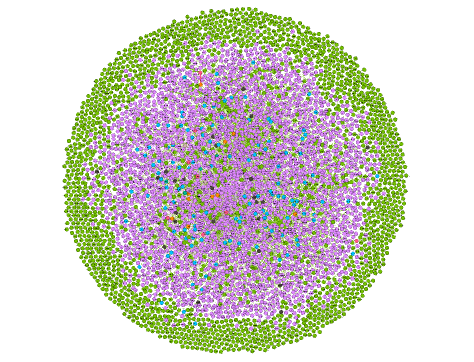

Gambar diatas menunjukan adanya suatu fragmentasi otoritas. Pada lapisan paling dalam yaitu berwarna ungu muda menunjukan bahwa akun-akun atau kata-kata tersebut adalah yang paling sentral dalam proses mengkontruksi, menginterpretasi dan mendiseminasi nasrasi selamat ualng tahun atau hal yang berkaitan dengan perayaan ulang tahun di media sosial twitter. Dalam hal tersebut juga menunjukan adanya sebuah otoritas dan pengaruh yang tinggi terkait satu tweet akun dengan lainnnya meskipun tidak memiliki followers yang besar sekalipun. 